In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree


from sklearn.model_selection import GridSearchCV

import graphviz
#!conda install --yes python-graphviz
#!conda install --yes graphviz

import matplotlib.pyplot as plt

In [2]:
! pip install imblearn

#if the above command does not work to install imblearn package run the following command in your terminal
#conda install -c glemaitre imbalanced-learn

In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [49]:
train_data = pd.read_csv("train.csv",header=0)

In [50]:
test_data = pd.read_csv("test.csv",header=0)

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [52]:
train_data.shape

(891, 12)

In [53]:
train_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

In [55]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mockler, Miss. Helen Mary ""Ellie""",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [56]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Drop Unnecessary variables

In [57]:
train_data.drop("PassengerId",axis=1,inplace=True)


In [58]:
train_data.drop("Name",axis=1,inplace=True)


In [59]:
train_data.drop("Cabin",axis=1,inplace=True)


In [60]:
train_data.drop("Parch",axis=1,inplace=True)
train_data.drop("Ticket",axis=1,inplace=True)
train_data.drop("Fare",axis=1,inplace=True)


In [61]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Embarked     object
dtype: object

In [62]:
for col in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    train_data[col] = train_data[col].astype('category')

In [63]:
test_data.drop("PassengerId",axis=1,inplace=True)
test_data.drop("Name",axis=1,inplace=True)
test_data.drop("Cabin",axis=1,inplace=True)
test_data.drop("Parch",axis=1,inplace=True)
test_data.drop("Ticket",axis=1,inplace=True)
test_data.drop("Fare",axis=1,inplace=True)



In [64]:
for col in ['Pclass', 'Sex', 'Embarked']:
    test_data[col] = test_data[col].astype('category')

In [65]:
cat_attr=list(train_data.select_dtypes("category").columns)

In [66]:
num_attr=list(train_data.columns.difference(cat_attr))
num_attr

['Age', 'SibSp']

In [67]:
cat_attr

['Survived', 'Pclass', 'Sex', 'Embarked']

In [68]:
cat_attr.remove("Survived")


In [38]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Embarked      2
dtype: int64

In [69]:
train_data_new=train_data.sample(frac=0.8,random_state=200) #random state is a seed value
val_data=train_data.drop(train_data_new.index)

In [70]:
#Performing train val split on the data
X_train, y_train = train_data_new.loc[:,train_data_new.columns!='Survived'], train_data_new.loc[:,'Survived']

X_val, y_val = val_data.loc[:,val_data.columns!='Survived'], val_data.loc[:,'Survived']

In [71]:
#### TYPE
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent',fill_value='missing_value')),('onehot',OneHotEncoder(handle_unknown='ignore'))])


preprocessor=ColumnTransformer(
    
transformers=[('num',numeric_transformer,num_attr),('cat',categorical_transformer,cat_attr)])

# Getting preprocessed data from pipeline

In [72]:
preprocess_train=Pipeline(steps=[('preprocessor',preprocessor)])

In [73]:
num_attr

['Age', 'SibSp']

In [74]:
X_train.head()

,Pclass,Sex,Age,SibSp,Embarked
659,1,male,58.0,0,C
525,3,male,40.5,0,Q
828,3,male,NaN,0,Q
753,3,male,23.0,0,S
518,2,female,36.0,1,S


In [75]:
#### TYPE
preprocessed_data_train=preprocess_train.fit_transform(X_train)

In [76]:
preprocessed_data_train=pd.DataFrame(preprocessed_data_train)
preprocessed_data_train.head()

,0,1,2,3,4,5,6,7,8,9
0,2.211691,-0.506086,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.870021,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.088315,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.471650,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.525020,0.461311,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [77]:
X_train.head()  #to give column name, we need to check numerical and categorical columns name thru below commands

,Pclass,Sex,Age,SibSp,Embarked
659,1,male,58.0,0,C
525,3,male,40.5,0,Q
828,3,male,NaN,0,Q
753,3,male,23.0,0,S
518,2,female,36.0,1,S


In [78]:
preprocess_train.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names()


array(['x0_1', 'x0_2', 'x0_3', 'x1_female', 'x1_male', 'x2_C', 'x2_Q',
       'x2_S'], dtype=object)

In [79]:
preprocessed_data_train.columns=['Age','SibSp','x0_1', 'x0_2', 'x0_3', 'x1_female', 'x1_male', 'x2_C', 'x2_Q',
       'x2_S']

In [80]:
preprocessed_data_train.head()

,Age,SibSp,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S
0,2.211691,-0.506086,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.870021,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.088315,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.471650,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.525020,0.461311,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Preprocessing val data from pipeline

In [81]:
preprocess_val=Pipeline(steps=[('preprocessor',preprocessor)])

In [84]:
#### TYPE
preprocessed_data_val=preprocess_val.fit_transform(X_val)

In [85]:
preprocessed_data_val=pd.DataFrame(preprocessed_data_val)
preprocessed_data_val.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.655752,0.355923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.343831,-0.389421,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.839613,-0.389421,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-2.215354,1.846611,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.109891,-0.389421,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [86]:
X_val.head()  #to give column name, we need to check numerical and categorical columns name thru below commands

,Pclass,Sex,Age,SibSp,Embarked
0,3,male,22.0,1,S
2,3,female,26.0,0,S
6,1,male,54.0,0,S
7,3,male,2.0,3,S
17,2,male,NaN,0,S


In [87]:
preprocess_val.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names()


array(['x0_1', 'x0_2', 'x0_3', 'x1_female', 'x1_male', 'x2_C', 'x2_Q',
       'x2_S'], dtype=object)

In [88]:
preprocessed_data_val.columns=['Age','SibSp','x0_1', 'x0_2', 'x0_3', 'x1_female', 'x1_male', 'x2_C', 'x2_Q',
       'x2_S']

In [89]:
preprocessed_data_val.head()

,Age,SibSp,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S
0,-0.655752,0.355923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.343831,-0.389421,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.839613,-0.389421,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-2.215354,1.846611,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.109891,-0.389421,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Manaully preprocessing data

In [90]:
df_cat_train = X_train[cat_attr]
df_cat_val = X_val[cat_attr]

In [91]:
type(df_cat_train)

pandas.core.frame.DataFrame

In [92]:
# Impute on train
df_cat_train = df_cat_train.fillna(df_cat_train.mode().iloc[0])

# Impute on val
df_cat_val = df_cat_val.fillna(df_cat_train.mode().iloc[0])

In [93]:
df_num_train = X_train[num_attr]
df_num_val = X_val[num_attr]

In [94]:
# Impute on train
df_num_train = df_num_train.fillna(df_num_train.median())

#Impute on val
df_num_val = df_num_val.fillna(df_num_train.median())

In [95]:
ohe = OneHotEncoder()

ohe.fit(df_cat_train)

columns_ohe = list(ohe.get_feature_names())
print(columns_ohe)

['x0_1', 'x0_2', 'x0_3', 'x1_female', 'x1_male', 'x2_C', 'x2_Q', 'x2_S']


In [96]:
df_cat_train = ohe.transform(df_cat_train)
df_cat_val = ohe.transform(df_cat_val)

In [97]:
df_cat_train = pd.DataFrame(df_cat_train.todense(), columns=columns_ohe)  #???
df_cat_val = pd.DataFrame(df_cat_val.todense(), columns=columns_ohe)

In [98]:
scaler = StandardScaler()

scaler.fit(df_num_train)

# scale on train
df_num_train= pd.DataFrame(scaler.transform(df_num_train))

# scale on val
df_num_val= pd.DataFrame(scaler.transform(df_num_val))

In [99]:
X_train_man = pd.concat([df_num_train, df_cat_train], axis=1)
X_val_man = pd.concat([df_num_val, df_cat_val], axis=1)

In [100]:
X_train_man.rename(columns={0:'Age',
                          1:'SibSp'}, 
                 inplace=True)

In [101]:
X_train_man.head()

,Age,SibSp,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S
0,2.211691,-0.506086,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.870021,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.088315,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.471650,-0.506086,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.525020,0.461311,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [102]:
X_val_man.rename(columns={0:'Age',
                          1:'SibSp'}, 
                 inplace=True)

In [103]:
X_val_man.head()

,Age,SibSp,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S
0,-0.548317,0.461311,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.241649,-0.506086,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.905023,-0.506086,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-2.081654,2.396106,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.088315,-0.506086,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Model Building

In [104]:
#### TYPE
clf_logreg=Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression())])

In [105]:
#### TYPE
clf_logreg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [106]:
train_pred=clf_logreg.predict(X_train)
val_pred=clf_logreg.predict(X_val)

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_val = confusion_matrix(y_val, val_pred)
print(confusion_matrix_train)
print(confusion_matrix_val)

[[383  56]
 [ 78 196]]
[[94 16]
 [24 44]]


In [109]:
Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("Train TNR: ",TNR_val)
print("Train TPR: ",TPR_val)
print("Train Accuracy: ",Accuracy_train)

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

Train TNR:  0.8545454545454545
Train TPR:  0.6470588235294118
Train Accuracy:  0.8120617110799438
val TNR:  0.8545454545454545
val TPR:  0.6470588235294118
val Accuracy:  0.7752808988764045


# ROC AUC

In [110]:
train_pred_proba = clf_logreg.predict_proba(X_train)[:,1]
print("predict_probs are ")
train_pred_proba[1:10]

predict_probs are 


array([0.09837984, 0.14284525, 0.1100536 , 0.72504982, 0.49003625,
       0.73024701, 0.08354601, 0.44096751, 0.12777312])

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [112]:
fpr, tpr, _ = metrics.roc_curve(y_train, train_pred_proba)

In [113]:
auc = metrics.roc_auc_score(y_train, train_pred_proba)
print("AUC =",auc)

AUC = 0.855939178291738


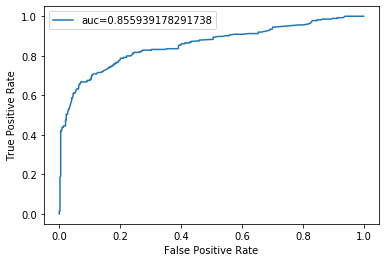

In [114]:
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# logistic on test

In [115]:
test_pred=clf_logreg.predict(test_data)

In [116]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
#df = pd.DataFrame(test_pred)

In [118]:
#df = pd.DataFrame(test_pred)
#df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df4.csv')

# ridgeclassifiercv  --elasticnetcv doesnot work for classifcation


In [119]:
from sklearn.linear_model import RidgeClassifierCV

In [120]:
#### TYPE
ridge_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RidgeClassifierCV(fit_intercept=True, alphas=[
                       0.0125, 0.025, 0.05,.1, .125, .25, .5, 1., 2., 4.,10,100]))])

In [121]:
#### TYPE
ridge_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [122]:
ridge_model.named_steps["classifier"].alpha_

10.0

In [123]:
train_pred=ridge_model.predict(X_train)

In [124]:
val_pred=ridge_model.predict(X_val)

In [125]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_val = confusion_matrix(y_val, val_pred)
print(confusion_matrix_train)
print(confusion_matrix_val)

[[380  59]
 [ 81 193]]
[[92 18]
 [24 44]]


In [126]:
Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("Train TNR: ",TNR_val)
print("Train TPR: ",TPR_val)
print("Train Accuracy: ",Accuracy_train)

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

Train TNR:  0.8363636363636363
Train TPR:  0.6470588235294118
Train Accuracy:  0.8036465638148668
val TNR:  0.8363636363636363
val TPR:  0.6470588235294118
val Accuracy:  0.7640449438202247


# lasso-cant use for classification, use logistic with l1 for lasso
The Lasso optimizes a least-square problem with a L1 penalty. By definition you can't optimize a logistic function with the Lasso.

If you want to optimize a logistic function with a L1 penalty, you can use the LogisticRegression estimator with the L1 penalty:

In [127]:
#### TYPE
clf_logreg=Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression(penalty='l1', solver='liblinear'))])

In [128]:
#### TYPE
clf_logreg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [129]:
train_pred=clf_logreg.predict(X_train)
val_pred=clf_logreg.predict(X_val)

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_val = confusion_matrix(y_val, val_pred)
print(confusion_matrix_train)
print(confusion_matrix_val)

[[382  57]
 [ 78 196]]
[[94 16]
 [24 44]]


In [132]:
Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("Train TNR: ",TNR_val)
print("Train TPR: ",TPR_val)
print("Train Accuracy: ",Accuracy_train)

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

Train TNR:  0.8545454545454545
Train TPR:  0.6470588235294118
Train Accuracy:  0.8106591865357644
val TNR:  0.8545454545454545
val TPR:  0.6470588235294118
val Accuracy:  0.7752808988764045


# KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
knn_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',KNeighborsClassifier(algorithm = 'brute',n_neighbors=28,metric="euclidean"))])

In [135]:
knn_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [136]:
val_pred=knn_model.predict(X_val)

In [137]:
confusion_matrix_val = confusion_matrix(y_val, val_pred)

print(confusion_matrix_val)


[[105   5]
 [ 33  35]]


In [139]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

val TNR:  0.9545454545454546
val TPR:  0.5147058823529411
val Accuracy:  0.7865168539325843


In [232]:
test_pred=knn_model.predict(test_data)

In [58]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\knn.csv')

In [140]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [141]:
knn_model.named_steps["classifier"]

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

In [142]:
# Creating odd list of K for KNN
myList = list(range(1,50))

# Empty list that will hold cv scores
cv_scores = []

# Perform 5-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_man, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [143]:
cv_scores

[0.7506064162754303,
 0.8192879499217527,
 0.8039906103286384,
 0.8080399061032864,
 0.8179773082942097,
 0.8122652582159624,
 0.8164906103286386,
 0.8192488262910798,
 0.8080203442879499,
 0.816471048513302,
 0.8136932707355242,
 0.8221244131455399,
 0.8221439749608764,
 0.8263497652582158,
 0.8291471048513301,
 0.8221244131455399,
 0.8263302034428796,
 0.8235133020344287,
 0.8192292644757433,
 0.8206768388106417,
 0.8192879499217527,
 0.8178990610328638,
 0.8206768388106415,
 0.8248630672926447,
 0.8276799687010954,
 0.8262910798122066,
 0.8291079812206572,
 0.8304968701095461,
 0.8262910798122064,
 0.8276799687010954,
 0.8290884194053207,
 0.8207159624413144,
 0.8178990610328638,
 0.8165101721439749,
 0.8164906103286386,
 0.816471048513302,
 0.8136345852895148,
 0.8094483568075118,
 0.8192683881064162,
 0.810856807511737,
 0.8136541471048513,
 0.8094679186228481,
 0.8094483568075116,
 0.8052034428794992,
 0.8080399061032864,
 0.8052034428794992,
 0.8023865414710485,
 0.8066118935837

The optimal number of neighbors is 28


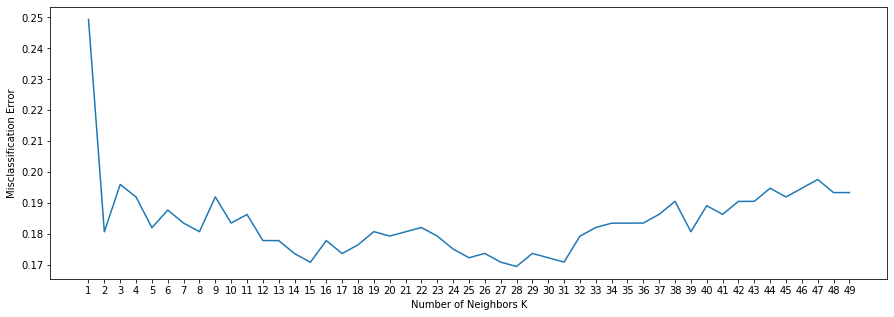

In [144]:
MCE = [1 - x for x in cv_scores]

# Determining best k
optimal_k = myList[MCE.index(min(MCE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(15,5))
plt.plot(myList, MCE)
plt.xticks(np.arange(1, 50, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Decision Tree

In [145]:
from sklearn import tree

In [146]:
decision_tree=Pipeline(steps=[('preprocessor',preprocessor),('classifier',tree.DecisionTreeClassifier())])

In [147]:
decision_tree.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [148]:
train_pred=decision_tree.predict(X_train)
val_pred=decision_tree.predict(X_val)

In [149]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_val = confusion_matrix(y_val, val_pred)
print(confusion_matrix_train)
print(confusion_matrix_val)

[[427  12]
 [ 39 235]]
[[95 15]
 [24 44]]


In [150]:
Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("Train TNR: ",TNR_val)
print("Train TPR: ",TPR_val)
print("Train Accuracy: ",Accuracy_train)

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

Train TNR:  0.8636363636363636
Train TPR:  0.6470588235294118
Train Accuracy:  0.9284712482468443
val TNR:  0.8636363636363636
val TPR:  0.6470588235294118
val Accuracy:  0.7808988764044944


In [402]:
df = pd.DataFrame(train_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\train2.csv')

# DT on test data

In [105]:
test_pred=decision_tree.predict(test_data)


In [ ]:
#df = pd.DataFrame(test_pred)
#df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df5.csv')

In [106]:
test_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

# Check important features

In [151]:
importances = decision_tree.steps[1][1].feature_importances_

In [152]:
features = X_train_man.columns
importances = decision_tree.steps[1][1].feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train_man.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9
0,x1_female,Age,x0_3,SibSp,x2_S,x2_C,x0_1,x0_2,x2_Q,x1_male
1,0.38725,0.304493,0.120362,0.096233,0.0315125,0.0235708,0.0221799,0.00906437,0.00533445,0


In [153]:
indices

array([5, 0, 4, 1, 9, 7, 2, 3, 8, 6], dtype=int64)

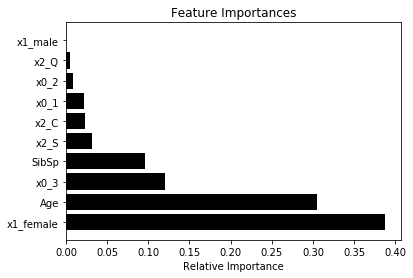

In [154]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Max_depth

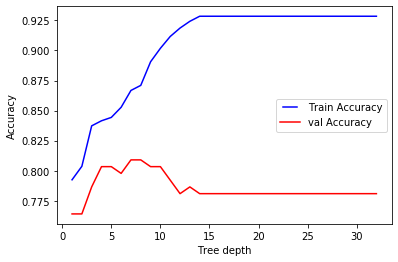

In [155]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
val_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_man, y_train)
    
    train_pred = dt.predict(X_train_man)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    val_pred = dt.predict(X_val_man)
    confusion_matrix_val = confusion_matrix(y_val, val_pred)
    Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
    val_results.append(Accuracy_val)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results,'r', label='val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

# DT with imp features and optimized tree depth

In [156]:
decision_tree=Pipeline(steps=[('classifier',tree.DecisionTreeClassifier(max_depth=4))])

In [157]:
select = indices[0:4]
select

array([5, 0, 4, 1], dtype=int64)

In [158]:
X_train_man.iloc[:,select]

,x1_female,Age,x0_3,SibSp
0,0.0,2.211691,0.0,-0.506086
1,0.0,0.870021,1.0,-0.506086
2,0.0,-0.088315,1.0,-0.506086
3,0.0,-0.471650,1.0,-0.506086
4,1.0,0.525020,0.0,0.461311
5,0.0,0.831687,0.0,-0.506086
6,1.0,-1.161652,1.0,0.461311
7,0.0,0.218352,1.0,-0.506086
8,1.0,0.525020,1.0,0.461311
9,0.0,-0.854984,1.0,-0.506086


In [159]:
decision_tree.fit(X_train_man.iloc[:,select],y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [160]:
train_pred=decision_tree.predict(X_train_man.iloc[:,select])
val_pred=decision_tree.predict(X_val_man.iloc[:,select])

In [161]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_val = confusion_matrix(y_val, val_pred)
print(confusion_matrix_train)
print(confusion_matrix_val)

[[402  37]
 [ 79 195]]
[[102   8]
 [ 26  42]]


In [162]:
Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("Train TNR: ",TNR_val)
print("Train TPR: ",TPR_val)
print("Train Accuracy: ",Accuracy_train)

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

Train TNR:  0.9272727272727272
Train TPR:  0.6176470588235294
Train Accuracy:  0.8373071528751753
val TNR:  0.9272727272727272
val TPR:  0.6176470588235294
val Accuracy:  0.8089887640449438


# SVM

In [163]:
%%time

svc_line=Pipeline(steps=[('preprocessor',preprocessor),('classifier',SVC())])
svc_line.set_params(classifier__kernel='linear',classifier__C=1,classifier__random_state=123)

svc_line.fit(X_train,y_train)

Wall time: 28 ms


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [164]:
train_pred_svc =svc_line.predict(X_train)
val_pred_svc = svc_line.predict(X_val)

In [165]:
df = pd.DataFrame(train_pred_svc)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\train3.csv')

In [166]:
confusion_matrix_val = confusion_matrix(y_val, val_pred_svc)
#confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_val)


#print(confusion_matrix_test)

[[94 16]
 [26 42]]


In [169]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

val TNR:  0.8545454545454545
val TPR:  0.6176470588235294
val Accuracy:  0.7640449438202247


In [168]:
confusion_matrix_train = confusion_matrix(y_train, train_pred_svc)
#confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)


#print(confusion_matrix_test)

[[374  65]
 [ 83 191]]


In [222]:
Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_train)

Train TNR:  0.8519362186788155
Train TPR:  0.6970802919708029
Train Accuracy:  0.7924263674614306


In [223]:
test_pred_svc =svc_line.predict(test_data)

In [225]:
df = pd.DataFrame(test_pred_svc)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df6.csv')

# Ensemble

In [170]:
!pip install xgboost

In [171]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [172]:
# Create adaboost-decision tree classifer object
Adaboost_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1))])


In [173]:
Adaboost_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [174]:
train_pred_Adaboost =Adaboost_model.predict(X_train)
val_pred_Adaboost = Adaboost_model.predict(X_val)

In [175]:
df = pd.DataFrame(train_pred_Adaboost)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\train4.csv')

In [176]:
confusion_matrix_val = confusion_matrix(y_val, val_pred_Adaboost)
#confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_val)


#print(confusion_matrix_test)

[[98 12]
 [21 47]]


In [178]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

val TNR:  0.8909090909090909
val TPR:  0.6911764705882353
val Accuracy:  0.8146067415730337


# Best model---saving it as pkl file

In [219]:
# save the model to disk
import pickle
filename = 'Adaboost_model.sav'
pickle.dump(Adaboost_model, open(filename, 'wb'))

In [179]:
confusion_matrix_train = confusion_matrix(y_train, train_pred_Adaboost)
#confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)


#print(confusion_matrix_test)

[[419  20]
 [ 40 234]]


In [180]:
Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_train)

Train TNR:  0.9544419134396356
Train TPR:  0.8540145985401459
Train Accuracy:  0.9158485273492286


In [181]:
test_pred_Adaboost =Adaboost_model.predict(test_data)

In [242]:
df = pd.DataFrame(test_pred_Adaboost)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df7.csv')

# Grid

In [182]:
param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

#Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
 #           DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [183]:
# Create adaboost-decision tree classifer object
Adaboost_model_grid=Pipeline(steps=[('preprocessor',preprocessor),('classifier',GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1))])


In [184]:
Adaboost_model_grid.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [185]:
train_pred_Adaboost_grid =Adaboost_model_grid.predict(X_train)
val_pred_Adaboost_grid = Adaboost_model_grid.predict(X_val)

In [416]:
df = pd.DataFrame(train_pred_Adaboost_grid)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\train5.csv')

In [186]:
confusion_matrix_val = confusion_matrix(y_val, val_pred_Adaboost_grid)
#confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_val)


#print(confusion_matrix_test)

[[101   9]
 [ 25  43]]


In [188]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

val TNR:  0.9181818181818182
val TPR:  0.6323529411764706
val Accuracy:  0.8089887640449438


In [190]:
Adaboost_model_grid.steps[1][1].best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [191]:
# Create adaboost-decision tree classifer object
Adaboost_model_grid_best=Pipeline(steps=[('preprocessor',preprocessor),('classifier',Adaboost_model_grid.steps[1][1].best_estimator_)])


In [192]:
Adaboost_model_grid_best.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [193]:
train_pred_Adaboost_grid_best =Adaboost_model_grid_best.predict(X_train)
val_pred_Adaboost_grid_best = Adaboost_model_grid_best.predict(X_val)

In [439]:
df = pd.DataFrame(train_pred_Adaboost_grid_best)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\train7.csv')

In [263]:
confusion_matrix_val = confusion_matrix(y_val, val_pred_Adaboost_grid_best)

print(confusion_matrix_val)


[[101   9]
 [ 25  43]]


In [194]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

val TNR:  0.9181818181818182
val TPR:  0.6323529411764706
val Accuracy:  0.8089887640449438


In [265]:
test_pred_Adaboost_best =Adaboost_model_grid_best.predict(test_data)

In [266]:
df = pd.DataFrame(test_pred_Adaboost_best)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df9.csv')

# Gradient Boosting

In [195]:
# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.2]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 5)

In [196]:
# Create adaboost-decision tree classifer object
Adaboost_model_GBM_grid=Pipeline(steps=[('preprocessor',preprocessor),('classifier',CV_GBM)])


In [197]:
Adaboost_model_GBM_grid.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [198]:
val_pred_Adaboost_GBM_grid = Adaboost_model_GBM_grid.predict(X_val)

In [199]:
train_pred_Adaboost_GBM_grid = Adaboost_model_GBM_grid.predict(X_train)

In [200]:
df = pd.DataFrame(train_pred_Adaboost_GBM_grid)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\train8.csv')

In [201]:
confusion_matrix_val = confusion_matrix(y_val, val_pred_Adaboost_GBM_grid)

print(confusion_matrix_val)


[[99 11]
 [23 45]]


In [203]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

val TNR:  0.9
val TPR:  0.6617647058823529
val Accuracy:  0.8089887640449438


In [277]:
best_estimator=Adaboost_model_GBM_grid.steps[1][1].best_estimator_

In [278]:
# Create adaboost-decision tree classifer object
Adaboost_model_GBM_grid_best=Pipeline(steps=[('preprocessor',preprocessor),('classifier',best_estimator)])


In [279]:
Adaboost_model_GBM_grid_best.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [280]:
val_pred_Adaboost_GBM_grid_best = Adaboost_model_GBM_grid_best.predict(X_val)

In [281]:
confusion_matrix_val = confusion_matrix(y_val, val_pred_Adaboost_GBM_grid_best)

print(confusion_matrix_val)


[[98 12]
 [24 44]]


In [204]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

val TNR:  0.9
val TPR:  0.6617647058823529
val Accuracy:  0.8089887640449438


In [283]:
test_pred_Adaboost_GBM_grid_best =Adaboost_model_GBM_grid_best.predict(test_data)

In [284]:
df = pd.DataFrame(test_pred_Adaboost_GBM_grid_best)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df10.csv')

# XGB

In [205]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 2),
     'n_estimators':[100],
     'max_depth': [10, 15]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [206]:
# Create adaboost-decision tree classifer object
Adaboost_model_XGB_grid=Pipeline(steps=[('preprocessor',preprocessor),('classifier',CV_XGB)])


In [207]:
Adaboost_model_XGB_grid.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [208]:
val_pred_Adaboost_XGB_grid = Adaboost_model_XGB_grid.predict(X_val)

In [209]:
train_pred_Adaboost_XGB_grid = Adaboost_model_XGB_grid.predict(X_train)

In [442]:
df = pd.DataFrame(train_pred_Adaboost_XGB_grid)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\train6.csv')

In [290]:
confusion_matrix_val = confusion_matrix(y_val, val_pred_Adaboost_XGB_grid)

print(confusion_matrix_val)


[[100  10]
 [ 23  45]]


In [210]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("Train TNR: ",TNR_val)
print("Train TPR: ",TPR_val)
print("Train Accuracy: ",Accuracy_val)

Train TNR:  0.9
Train TPR:  0.6617647058823529
Train Accuracy:  0.8089887640449438


In [292]:
test_pred_Adaboost_XGB_grid = Adaboost_model_XGB_grid.predict(test_data)

In [293]:
df = pd.DataFrame(test_pred_Adaboost_XGB_grid)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df11.csv')

# Stacking

In [450]:
data = pd.read_csv("book2.csv",header=0)

In [451]:
data.head()

,x1,x3,x5,x8,x6
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1


In [452]:
data.dtypes

x1    int64
x3    int64
x5    int64
x8    int64
x6    int64
dtype: object

In [453]:
for col in ['x1','x3','x5','x8','x6']:
    data[col] = data[col].astype('category')

In [454]:
#### TYPE
clf_logreg=LogisticRegression()

In [455]:
#### TYPE
clf_logreg.fit(data,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [456]:
data_test = pd.read_csv("teststacking.csv",header=0)

In [460]:
x=clf_logreg.predict(data_test)
x

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [459]:
df = pd.DataFrame(x)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\stacking.csv')

In [462]:
data_pred = pd.read_csv("book1.csv",header=0)

In [468]:
a=data_pred.mode(axis=1, numeric_only=False)
a.head()

,0
0,0
1,0
2,0
3,0
4,1


In [293]:
df = pd.DataFrame(test_pred_Adaboost_XGB_grid)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df11.csv')

In [467]:
df = pd.DataFrame(a)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\stacking1.csv')

# Random Forest

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
Randomforest_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier(n_estimators=10,max_depth=8))])

In [213]:
Randomforest_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [214]:
Randomforest_pred=Randomforest_model.predict(test_data)

In [215]:
Randomforest_pred_val = Randomforest_model.predict(X_val)

In [216]:
confusion_matrix_val = confusion_matrix(y_val, Randomforest_pred_val)

print(confusion_matrix_val)


[[101   9]
 [ 28  40]]


In [217]:
Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

val TNR:  0.9181818181818182
val TPR:  0.5882352941176471
val Accuracy:  0.7921348314606742


In [292]:
test_pred_Adaboost_XGB_grid = Adaboost_model_XGB_grid.predict(test_data)

In [293]:
df = pd.DataFrame(test_pred_Adaboost_XGB_grid)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df11.csv')

In [530]:
df = pd.DataFrame(Randomforest_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\random.csv')

# Check important features

In [319]:
importances = Randomforest_model.steps[1][1].feature_importances_

In [320]:
features = X_train_man.columns
importances = Randomforest_model.steps[1][1].feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train_man.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9
0,Age,x1_female,x1_male,x0_3,SibSp,x0_1,x2_S,x0_2,x2_Q,x2_C
1,0.293015,0.247501,0.181987,0.0829499,0.0822976,0.0471863,0.0326363,0.0193935,0.00719815,0.0058358


In [321]:
indices

array([0, 5, 6, 4, 1, 2, 9, 3, 8, 7], dtype=int64)

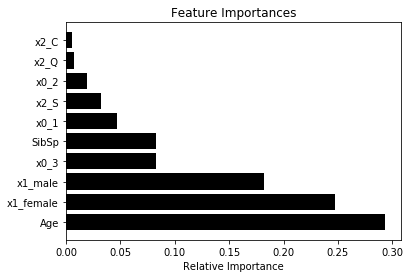

In [322]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Max_depth

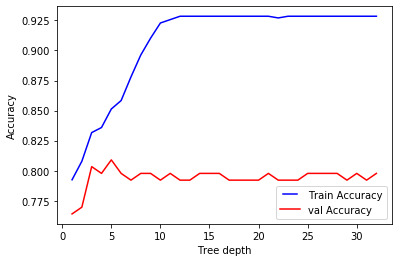

In [323]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
val_results = []

for max_depth in max_depths:
    dt = RandomForestClassifier(max_depth=max_depth)
    dt.fit(X_train_man, y_train)
    
    train_pred = dt.predict(X_train_man)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    val_pred = dt.predict(X_val_man)
    confusion_matrix_val = confusion_matrix(y_val, val_pred)
    Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
    val_results.append(Accuracy_val)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results,'r', label='val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

# DT with imp features and optimized tree depth

In [325]:
random_tree=Pipeline(steps=[('classifier',RandomForestClassifier(max_depth=5))])

In [326]:
select = indices[0:3]
select

array([0, 5, 6], dtype=int64)

In [303]:
X_train_man.iloc[:,select]

,x1_female,Age,x0_3,SibSp
0,0.0,2.211691,0.0,-0.506086
1,0.0,0.870021,1.0,-0.506086
2,0.0,-0.088315,1.0,-0.506086
3,0.0,-0.471650,1.0,-0.506086
4,1.0,0.525020,0.0,0.461311
5,0.0,0.831687,0.0,-0.506086
6,1.0,-1.161652,1.0,0.461311
7,0.0,0.218352,1.0,-0.506086
8,1.0,0.525020,1.0,0.461311
9,0.0,-0.854984,1.0,-0.506086


In [327]:
random_tree.fit(X_train_man.iloc[:,select],y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [328]:
train_pred=random_tree.predict(X_train_man.iloc[:,select])
val_pred=random_tree.predict(X_val_man.iloc[:,select])

In [329]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_val = confusion_matrix(y_val, val_pred)
print(confusion_matrix_train)
print(confusion_matrix_val)

[[384  55]
 [ 77 197]]
[[94 16]
 [23 45]]


In [330]:
Accuracy_train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
TNR_val= confusion_matrix_val[0,0]/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1])
TPR_val= confusion_matrix_val[1,1]/(confusion_matrix_val[1,0]+confusion_matrix_val[1,1])

print("Train TNR: ",TNR_val)
print("Train TPR: ",TPR_val)
print("Train Accuracy: ",Accuracy_train)

print("val TNR: ",TNR_val)
print("val TPR: ",TPR_val)
print("val Accuracy: ",Accuracy_val)

Train TNR:  0.8545454545454545
Train TPR:  0.6617647058823529
Train Accuracy:  0.814866760168303
val TNR:  0.8545454545454545
val TPR:  0.6617647058823529
val Accuracy:  0.7808988764044944


# Featuring engineering

In [7]:
train_data = pd.read_csv("train.csv",header=0)

In [8]:
test_data = pd.read_csv("test.csv",header=0)

In [9]:
titanic = train_data.append(test_data, ignore_index=True,sort=False)

In [10]:
train_data_idx = len(train_data)
test_data_idx = len(titanic) - len(test_data)


In [11]:
train_data_idx

891

In [12]:
test_data_idx

891

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [15]:
# create a new feature to extract title names from the Name column
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [16]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles 
titanic.Title = titanic.Title.map(normalized_titles)
# view value counts for the normalized titles
print(titanic.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [17]:
# group by Sex, Pclass, and Title 
grouped = titanic.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [18]:
# apply the grouped median value on the Age NaN
titanic.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [19]:
titanic.Cabin = titanic.Cabin.fillna('U')

In [20]:
# size of families (including the passenger)
titanic['FamilySize'] = titanic.Parch + titanic.SibSp + 1

In [21]:
# map first letter of cabin to itself
titanic.Cabin = titanic.Cabin.map(lambda x: x[0])

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
FamilySize     1309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 143.2+ KB


In [23]:
# create train and test data
train_data= titanic[ :train_data_idx]
test_data= titanic[test_data_idx: ]

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null float64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 97.5+ KB


In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 14 columns):
PassengerId    418 non-null int64
Survived       0 non-null float64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
Title          418 non-null object
FamilySize     418 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 45.8+ KB


In [26]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q,Mr,1
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S,Mrs,2
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q,Mr,1
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S,Mr,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S,Mrs,3


In [27]:
test_data.drop("Survived",axis=1,inplace=True)

In [28]:
train_data['Died'] = 1 - train_data['Survived']

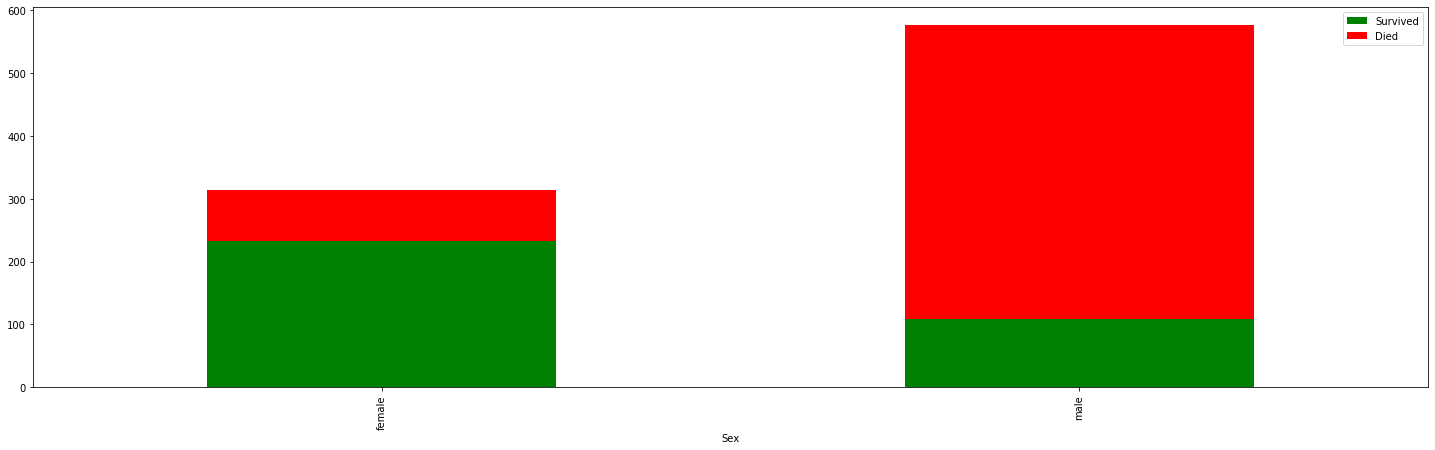

In [29]:
train_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);


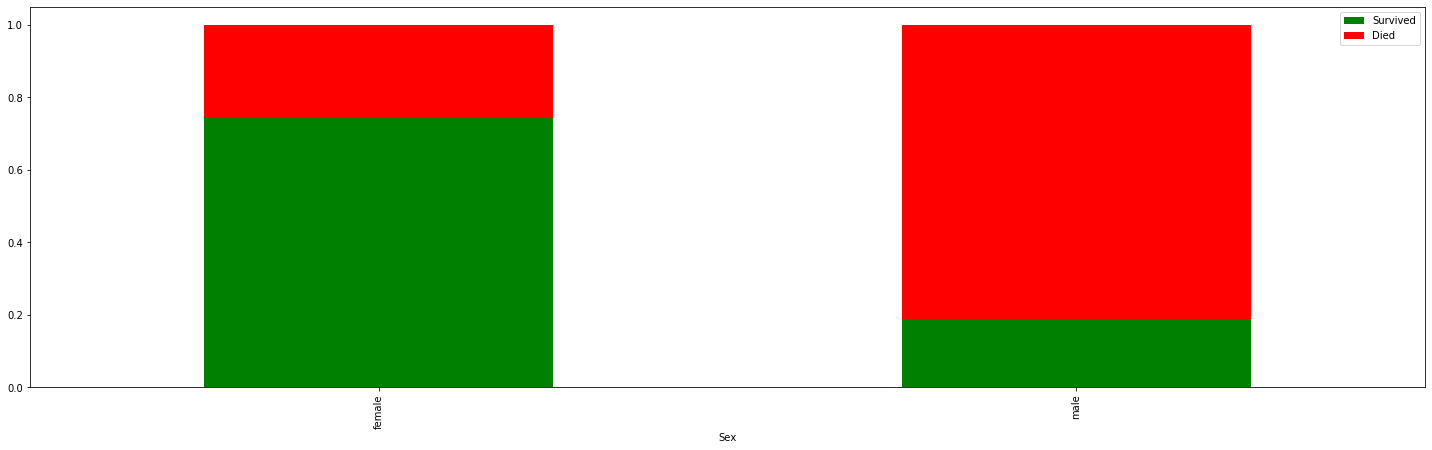

In [30]:
train_data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);


# Drop Unnecessary variables

In [31]:
train_data.drop("PassengerId",axis=1,inplace=True)

In [32]:
train_data.drop("Name",axis=1,inplace=True)


In [33]:
train_data.drop("Ticket",axis=1,inplace=True)

In [34]:
train_data.dtypes

Survived      float64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Cabin          object
Embarked       object
Title          object
FamilySize      int64
Died          float64
dtype: object

In [35]:
for col in ['Survived', 'Pclass', 'Sex', 'Embarked','Cabin','Title']:
    train_data[col] = train_data[col].astype('category')

In [36]:
for col in ['Pclass', 'Sex', 'Embarked','Cabin','Title']:
    test_data[col] = test_data[col].astype('category')

In [37]:
train_data.drop("Died",axis=1,inplace=True)

In [38]:
cat_attr=list(train_data.select_dtypes("category").columns)

In [39]:
num_attr=list(train_data.columns.difference(cat_attr))
num_attr

['Age', 'FamilySize', 'Fare', 'Parch', 'SibSp']

In [40]:
cat_attr.remove("Survived")


In [41]:
#### TYPE
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent',fill_value='missing_value')),('onehot',OneHotEncoder(handle_unknown='ignore'))])


preprocessor=ColumnTransformer(
    
transformers=[('num',numeric_transformer,num_attr),('cat',categorical_transformer,cat_attr)])

In [42]:
X_train, y_train = train_data.loc[:,train_data.columns!='Survived'], train_data.loc[:,'Survived']

In [43]:
df_cat_train = X_train[cat_attr]

In [44]:
df_cat_test = test_data[cat_attr]

In [45]:
# Impute on train
df_cat_train = df_cat_train.fillna(df_cat_train.mode().iloc[0])

# Impute on test
#df_cat_val = df_cat_val.fillna(df_cat_val.mode().iloc[0])

In [46]:
df_cat_test = df_cat_test.fillna(df_cat_test.mode().iloc[0])

In [47]:
df_num_train = X_train[num_attr]
#df_num_val = X_val[num_attr]

In [48]:
df_num_test = test_data[num_attr]

In [49]:
# Impute on train
df_num_train = df_num_train.fillna(df_num_train.median())

#Impute on test
#df_num_val = df_num_val.fillna(df_num_val.median())

In [50]:
df_num_test = df_num_test.fillna(df_num_test.median())

In [56]:
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(df_cat_train)

columns_ohe = list(ohe.get_feature_names())
print(columns_ohe)

['x0_1', 'x0_2', 'x0_3', 'x1_female', 'x1_male', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F', 'x2_G', 'x2_T', 'x2_U', 'x3_C', 'x3_Q', 'x3_S', 'x4_Master', 'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_Officer', 'x4_Royalty']


In [57]:
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(df_cat_test)

columns_ohe = list(ohe.get_feature_names())
print(columns_ohe)

['x0_1', 'x0_2', 'x0_3', 'x1_female', 'x1_male', 'x2_A', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F', 'x2_G', 'x2_U', 'x3_C', 'x3_Q', 'x3_S', 'x4_Master', 'x4_Miss', 'x4_Mr', 'x4_Mrs', 'x4_Officer', 'x4_Royalty']


In [58]:
df_cat_train = ohe.transform(df_cat_train)
#df_cat_val = ohe.transform(df_cat_val)

In [59]:
df_cat_test = ohe.transform(df_cat_test)
#df_cat_val = ohe.transform(df_cat_val)

In [60]:
df_cat_train = pd.DataFrame(df_cat_train.todense(), columns=columns_ohe)
#df_cat_val = pd.DataFrame(df_cat_val.todense(), columns=columns_ohe)

In [61]:
df_cat_test = pd.DataFrame(df_cat_test.todense(), columns=columns_ohe)
#df_cat_val = pd.DataFrame(df_cat_val.todense(), columns=columns_ohe)

In [62]:
#num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
scaler = StandardScaler()

scaler.fit(df_num_train)

# scale on train
df_num_train= pd.DataFrame(scaler.transform(df_num_train))

# scale on test
#df_num_val= pd.DataFrame(scaler.transform(df_num_val))

In [63]:
#num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
scaler = StandardScaler()

scaler.fit(df_num_test)

# scale on train
df_num_test= pd.DataFrame(scaler.transform(df_num_test))

# scale on test
#df_num_val= pd.DataFrame(scaler.transform(df_num_val))

In [64]:
X_train_man = pd.concat([df_num_train, df_cat_train], axis=1)
#X_val_man = pd.concat([df_num_val, df_cat_val], axis=1)

In [65]:
X_test_man = pd.concat([df_num_test, df_cat_test], axis=1)
#X_val_man = pd.concat([df_num_val, df_cat_val], axis=1)

In [ ]:
X_train_man.head()

In [ ]:
X_test_man.head()

In [ ]:
X_train.head()

In [66]:
X_train_man.rename(columns={0:'Age',
                          1:'SibSp',2:'Parch',3:'Fare',4:'FamilySize'}, 
                 inplace=True)

In [67]:
X_test_man.rename(columns={0:'Age',
                          1:'SibSp',2:'Parch',3:'Fare',4:'FamilySize'}, 
                 inplace=True)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
Randomforest_model=Pipeline(steps=[('classifier',RandomForestClassifier(n_estimators=10,max_depth=8))])

In [56]:
#model = SelectFromModel(clf, prefit=True)
#train_reduced = model.transform(train)

In [57]:
#selectfrom_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',SelectFromModel(clf.steps[1][1], prefit=True))])

In [58]:
#train_reduced = selectfrom_model.transform(X_train)

In [59]:
#train_reduced_df=pd.DataFrame(train_reduced)

In [60]:
#feature_idx = selectfrom_model.steps[1][1].get_support()


In [71]:
Randomforest_model.fit(X_train_man,y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [72]:
features = X_train_man.columns
importances = Randomforest_model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train_man.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,x4_Mr,x1_female,Parch,Age,x1_male,x0_3,SibSp,x4_Miss,x2_U,FamilySize,...,x2_D,x3_C,x2_E,x2_C,x3_Q,x2_B,x4_Royalty,x2_G,x2_A,x2_F
1,0.15607,0.123132,0.104532,0.0981844,0.0939993,0.0761512,0.0637351,0.0606091,0.0434712,0.0380366,...,0.00881645,0.0081014,0.0058276,0.00506909,0.0040052,0.00364394,0.000961229,0.000594293,0.000298678,2.68846e-05


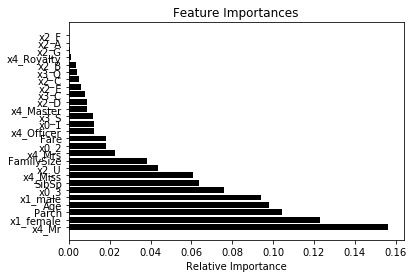

In [73]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [74]:
indices

array([23,  8,  2,  0,  9,  7,  1, 22, 17,  4, 24,  6,  3, 25,  5, 20, 21,
       13, 18, 14, 12, 19, 11, 26, 16, 10, 15], dtype=int64)

In [75]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,3,male,22.0,1,0,7.2500,U,S,Mr,2
1,1,female,38.0,1,0,71.2833,C,C,Mrs,2
2,3,female,26.0,0,0,7.9250,U,S,Miss,1
3,1,female,35.0,1,0,53.1000,C,S,Mrs,2
4,3,male,35.0,0,0,8.0500,U,S,Mr,1


In [75]:
X_train_man.head()

,Age,SibSp,Parch,Fare,FamilySize,x0_1,x0_2,x0_3,x1_female,x1_male,...,x2_U,x3_C,x3_Q,x3_S,x4_Master,x4_Miss,x4_Mr,x4_Mrs,x4_Officer,x4_Royalty
0,-0.531932,0.059160,-0.502445,-0.473674,0.432793,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.648857,0.059160,0.786845,-0.473674,0.432793,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.236735,-0.560975,-0.488854,-0.473674,-0.474545,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.427459,0.059160,0.420730,-0.473674,0.432793,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.427459,-0.560975,-0.486337,-0.473674,-0.474545,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,3,male,22.0,1,0,7.2500,U,S,Mr,2
1,1,female,38.0,1,0,71.2833,C,C,Mrs,2
2,3,female,26.0,0,0,7.9250,U,S,Miss,1
3,1,female,35.0,1,0,53.1000,C,S,Mrs,2
4,3,male,35.0,0,0,8.0500,U,S,Mr,1


In [115]:
X_train_man.iloc[:,24]

In [76]:
select = indices[0:5]
#Randomforest_model.fit(X_train_man.iloc[:,select],y_train)

In [77]:
select

array([23,  8,  2,  0,  9], dtype=int64)

In [ ]:
#train_pred = clf.predict(X_train[:,select])
test_pred = Randomforest_model.predict(X_test_man.iloc[:,select])

In [140]:
test_pred

array([0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1.

In [141]:

print(test_pred[:5])

[0. 0. 0. 0. 1.]


In [145]:
test_pred=Randomforest_model.predict(test_data)

In [142]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\random4.csv')

In [151]:
#### TYPE
clf_logreg=Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression())])

In [152]:
#### TYPE
clf_logreg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [149]:
test_pred=clf_logreg.predict(test_data)

In [135]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\random3.csv')

In [80]:
clf_logreg1=LogisticRegression()

In [79]:
clf_logreg1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None,
                   penalty=array([23,  8,  2,  0,  9], dtype=int64),
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
clf_logreg1.fit(X_train_man.iloc[:,select],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
test_pred=clf_logreg1.predict(X_test_man.iloc[:,select])

In [83]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\log2.csv')